# SVG 지도시각화(전국)

## #01. 작업준비

### 패키지 가져오기

In [28]:
# jupyter 상에서 SVG 이미지를 표시하기 위한 패키지(jupyter 기본 내장 패키지)
from IPython.display import SVG

# TAG로부터 원하는 내용을 추출하는 클래스 -> SVG 이미지의 핸들링을 위함
from bs4 import BeautifulSoup

# 원격지의 svg 파일의 내용을 읽어오기 위함.
import requests

from pandas import pivot_table, read_excel
import numpy as np
import os

### 데이터 불러오기

전국 학교 분포

In [29]:
xlsx = read_excel("https://data.hossam.kr/D04/school.xlsx")
xlsx

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000004204,한울초등학교,초등학교,2008-09-01,공립,본교,운영,경기도 화성시 향남읍 행정리 442,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),7530000,경기도교육청,7679000,경기도화성오산교육지원청,2013-11-29,2022-10-06,37.126961,126.917854,2023-03-22,C738100,청주대학교 지방교육재정연구원
1,B000011476,수원농생명과학고등학교,고등학교,1936-07-01,공립,본교,운영,경기도 수원시 장안구 영화동 109,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),7530000,경기도교육청,7541000,경기도수원교육지원청,2013-11-29,2022-10-06,37.295154,127.019450,2023-03-22,C738100,청주대학교 지방교육재정연구원
2,B000009647,녹양중학교,중학교,2008-03-01,공립,본교,운영,경기도 의정부시 녹양동 191-5,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),7530000,경기도교육청,7561000,경기도의정부교육지원청,2013-11-29,2022-10-06,37.761864,127.028084,2023-03-22,C738100,청주대학교 지방교육재정연구원
3,B000005955,초락초등학교,초등학교,1959-04-02,공립,본교,운영,충청남도 당진시 석문면 초락도리 210-3,충청남도 당진시 석문면 샛터말길 35 (석문면),8140000,충청남도교육청,8291000,충청남도당진교육지원청,2013-11-29,2022-10-06,36.993080,126.510472,2023-03-22,C738100,청주대학교 지방교육재정연구원
4,B000005385,상봉초등학교,초등학교,1946-09-01,공립,본교,운영,충청북도 청주시 흥덕구 오송읍 상봉리 242-1,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),8000000,충청북도교육청,8011000,충청북도청주교육지원청,2013-11-29,2022-10-06,36.638251,127.286142,2023-03-22,C738100,청주대학교 지방교육재정연구원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,B000003371,대전옥계초등학교,초등학교,1982-12-09,공립,본교,운영,대전광역시 중구 옥계동 65,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),7430000,대전광역시교육청,7441000,대전광역시동부교육지원청,2013-11-29,2022-10-06,36.301199,127.449039,2023-03-22,C738100,청주대학교 지방교육재정연구원
11984,B000003345,성덕초등학교,초등학교,2011-03-11,공립,본교,운영,광주광역시 광산구 장덕동 1042,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),7380000,광주광역시교육청,7401000,광주광역시서부교육지원청,2013-11-29,2022-10-06,35.199148,126.814301,2023-03-22,C738100,청주대학교 지방교육재정연구원
11985,B000005441,이월초등학교,초등학교,1920-04-01,공립,본교,운영,충청북도 진천군 이월면 송림리 667,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),8000000,충청북도교육청,8081000,충청북도진천교육지원청,2013-11-29,2022-10-06,36.931076,127.431922,2023-03-22,C738100,청주대학교 지방교육재정연구원
11986,B000009875,해안중학교,중학교,1979-03-08,공립,본교,운영,강원도 양구군 해안면 현리 143,강원도 양구군 해안면 펀치볼로 1279 (해안면),7800000,강원도교육청,7951000,강원도양구교육지원청,2013-11-29,2022-10-06,38.283771,128.135686,2023-03-22,C738100,청주대학교 지방교육재정연구원


## #02. 데이터 전처리 및 정제

### 필요한 변수만 추출

In [30]:
학교추출df = xlsx.filter(['학교명', '학교급구분', '소재지도로명주소'])
학교추출df

,학교명,학교급구분,소재지도로명주소
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍)
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교)
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동)
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면)
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍)
...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교)
11984,성덕초등학교,초등학교,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동)
11985,이월초등학교,초등학교,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면)
11986,해안중학교,중학교,강원도 양구군 해안면 펀치볼로 1279 (해안면)


### 결측치 확인

In [31]:
학교추출df.isna().sum()

학교명         0
학교급구분       0
소재지도로명주소    0
dtype: int64

### 주소에서 첫 번째 공백 위치 찾기

In [32]:
학교추출df['소재지도로명주소']

0              경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍)
1               경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교)
2                    경기도 의정부시 체육로 187 . 녹양중학교 (녹양동)
3                        충청남도 당진시 석문면 샛터말길 35 (석문면)
4             충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍)
                            ...                    
11983               대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교)
11984              광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동)
11985           충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면)
11986                   강원도 양구군 해안면 펀치볼로 1279 (해안면)
11987    경상남도 합천군 초계면 초계중앙로 83 . 초계중학교 (초계면. 초계중학교)
Name: 소재지도로명주소, Length: 11988, dtype: object

In [33]:
addr_split = 학교추출df['소재지도로명주소'].str.split(' ')
addr_split

0            [경기도, 화성시, 향남읍, 행정중앙1로, 25, ., 한울초등학교, (향남읍)]
1               [경기도, 수원시, 장안구, 광교산로, 13, (영화동.농생명과학고등학교)]
2                   [경기도, 의정부시, 체육로, 187, ., 녹양중학교, (녹양동)]
3                        [충청남도, 당진시, 석문면, 샛터말길, 35, (석문면)]
4          [충청북도, 청주시, 흥덕구, 오송읍, 상봉길, 9, ., 상봉초등학교, (오송읍)]
                               ...                        
11983               [대전광역시, 중구, 모암로, 35, (옥계동., 대전옥계초등학교)]
11984             [광주광역시, 광산구, 풍영로, 313, ., 성덕초등학교, (장덕동)]
11985         [충청북도, 진천군, 이월면, 송림6길, 26, ., 이월초등학교, (이월면)]
11986                   [강원도, 양구군, 해안면, 펀치볼로, 1279, (해안면)]
11987    [경상남도, 합천군, 초계면, 초계중앙로, 83, ., 초계중학교, (초계면., 초...
Name: 소재지도로명주소, Length: 11988, dtype: object

In [34]:
학교추출df['시도명'] = addr_split.str.get(0)
학교추출df

,학교명,학교급구분,소재지도로명주소,시도명
0,한울초등학교,초등학교,경기도 화성시 향남읍 행정중앙1로 25 . 한울초등학교 (향남읍),경기도
1,수원농생명과학고등학교,고등학교,경기도 수원시 장안구 광교산로 13 (영화동.농생명과학고등학교),경기도
2,녹양중학교,중학교,경기도 의정부시 체육로 187 . 녹양중학교 (녹양동),경기도
3,초락초등학교,초등학교,충청남도 당진시 석문면 샛터말길 35 (석문면),충청남도
4,상봉초등학교,초등학교,충청북도 청주시 흥덕구 오송읍 상봉길 9 . 상봉초등학교 (오송읍),충청북도
...,...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시 중구 모암로 35 (옥계동. 대전옥계초등학교),대전광역시
11984,성덕초등학교,초등학교,광주광역시 광산구 풍영로 313 . 성덕초등학교 (장덕동),광주광역시
11985,이월초등학교,초등학교,충청북도 진천군 이월면 송림6길 26 . 이월초등학교 (이월면),충청북도
11986,해안중학교,중학교,강원도 양구군 해안면 펀치볼로 1279 (해안면),강원도


### 시도명의 데이터 분포 확인

In [35]:
학교추출df['시도명'].value_counts()

시도명
경기도        2493
서울특별시      1313
경상남도        984
경상북도        954
전라남도        859
전라북도        763
충청남도        726
강원도         643
부산광역시       617
인천광역시       540
충청북도        479
대구광역시       452
광주광역시       315
대전광역시       303
울산광역시       243
제주특별자치도     200
세종특별자치시     101
전북            3
Name: count, dtype: int64

In [36]:
학교추출df.loc[학교추출df['시도명'] == '전북', '시도명'] = '전라북도'
학교추출df['시도명'].value_counts()

시도명
경기도        2493
서울특별시      1313
경상남도        984
경상북도        954
전라남도        859
전라북도        766
충청남도        726
강원도         643
부산광역시       617
인천광역시       540
충청북도        479
대구광역시       452
광주광역시       315
대전광역시       303
울산광역시       243
제주특별자치도     200
세종특별자치시     101
Name: count, dtype: int64

## #03. 탐색적 데이터 분석

### 그룹분석

In [37]:
fdf = 학교추출df.filter(['학교명', '학교급구분', '시도명'])
fdf

,학교명,학교급구분,시도명
0,한울초등학교,초등학교,경기도
1,수원농생명과학고등학교,고등학교,경기도
2,녹양중학교,중학교,경기도
3,초락초등학교,초등학교,충청남도
4,상봉초등학교,초등학교,충청북도
...,...,...,...
11983,대전옥계초등학교,초등학교,대전광역시
11984,성덕초등학교,초등학교,광주광역시
11985,이월초등학교,초등학교,충청북도
11986,해안중학교,중학교,강원도


### 데이터 집계

그룹분석 결과를 피벗테이블로 재구성하기 위해 as_index=False 파라미터를 사용하여 인덱스를 병합하지 않도록 지정한다.

In [38]:
집계df = fdf.groupby(['시도명', '학교급구분'], as_index=False).count()
집계df

,시도명,학교급구분,학교명
0,강원도,고등학교,115
1,강원도,중학교,160
2,강원도,초등학교,368
3,경기도,고등학교,486
4,경기도,중학교,662
5,경기도,초등학교,1345
6,경상남도,고등학교,192
7,경상남도,중학교,268
8,경상남도,초등학교,524
9,경상북도,고등학교,185


### 컬럼이름 변경

In [39]:
집계결과df = 집계df.rename(columns={'학교명': '학교수'})
집계결과df

,시도명,학교급구분,학교수
0,강원도,고등학교,115
1,강원도,중학교,160
2,강원도,초등학교,368
3,경기도,고등학교,486
4,경기도,중학교,662
5,경기도,초등학교,1345
6,경상남도,고등학교,192
7,경상남도,중학교,268
8,경상남도,초등학교,524
9,경상북도,고등학교,185


### 집계결과를 피벗 테이블로 재배치

In [40]:
pdf = pivot_table(집계결과df, index='시도명', columns='학교급구분', values='학교수')  
pdf

학교급구분,고등학교,중학교,초등학교
시도명,,,
강원도,115,160,368
경기도,486,662,1345
경상남도,192,268,524
경상북도,185,267,502
광주광역시,68,92,155
대구광역시,95,124,233
대전광역시,62,89,152
부산광역시,142,170,305
서울특별시,320,389,604


## #04. 데이터 시각화

https://data.hossam.kr/D04/map_korea.svg

### 지도 SVG 파일 가져오기

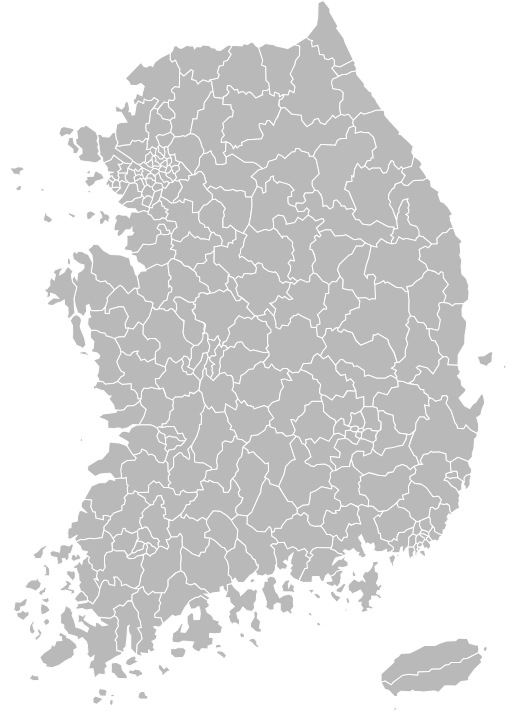

In [42]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None}

r = requests.get('https://data.hossam.kr/D04/map_korea.svg', headers=header_info)

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
SVG(map_svg)

### 단계별 색상값 준비

In [43]:
colors = ['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']
colors

['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']

### SVG에서 시,도 단위로 추출

In [44]:
soup = BeautifulSoup(map_svg)
sido = soup.select('g[id]')
sido

c:\Users\leekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[<g id="서울특별시">
 <path d="M171.5,167.272v2.167l1.167,1.25l-0.25,1.083l1.083,1.75l1.917,0.583
 		l0.333-1.5l3.833-2.833l-0.333-2.5l-0.833-1.667l-3.667-0.333L171.5,167.272" fill="#B9B9B9" id="강동구" stroke="#FFFFFF"></path>
 <path d="M171.5,169.439l-2.25,3.25l-3.333,0.417v2.5l2.833,2.25l1-0.083l0.667,1
 		l1.167,0.917l1.25,2.5l3.75-4.583l-1.167-3v-0.5l-1.917-0.583l-0.917-1.917l0.083-0.917L171.5,169.439z" fill="#B9B9B9" id="송파구" stroke="#FFFFFF"></path>
 <path d="M168.583,165.605l-1.5,0.25l-0.583,1.75l-1.25,3l-0.583,1.917l1.25,0.583
 		l3.333-0.417l2.25-3.25l-0.083-1.917l-1.833-3.083L168.583,165.605z" fill="#B9B9B9" id="광진구" stroke="#FFFFFF"></path>
 <path d="M166.667,158.939l0.417,6.917l1.5-0.25l3-2.917l-0.167-3.917L171,157.855
 		l-2.583,0.083L166.667,158.939z" fill="#B9B9B9" id="중랑구" stroke="#FFFFFF"></path>
 <path d="M164.917,146.605l-0.833,2.833l0.667,2.417l-0.5,3.75l-1.083,0.417
 		l1.75,2.083l1.917,1l1.583-1.167l3,0.333l-3-5.333l-0.5-6L164.917,146.605" fill="#B9B9B9" id="노원구" stroke=

### 지도상의 시, 도 단위로 반복

In [53]:
stype = "초등학교"

for item in sido:
    지역명 = item['id']

    # 지도상의 지역명이 데이터프레임에 없다면 무시한다.
    if 지역명 not in pdf.index:
        continue

    # 지역명에 해당하는 데이터를 추출한다.
    count = pdf.loc[지역명, stype]
    print(지역명, " --> ", count)

    # 학교 수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
    if count > 500:   color_index = 5
    elif count > 400: color_index = 4
    elif count > 300: color_index = 3
    elif count > 200: color_index = 2
    elif count > 100: color_index = 1
    else:             color_index = 0

    # 시,도 안에서 구,군을 추출하여 반복
    for p in item.select('path'):
        if "fill" in p.attrs:
            p['fill'] = colors[color_index]

# SVG 이미지를 파일로 저장
with open('result.svg', 'w', encoding="utf-8") as f:
    f.write(soup.prettify())

서울특별시  -->  604
인천광역시  -->  270
경기도  -->  1345
강원도  -->  368
충청북도  -->  267
대전광역시  -->  152
충청남도  -->  421
제주특별자치도  -->  119
경상북도  -->  502
대구광역시  -->  233
울산광역시  -->  122
경상남도  -->  524
부산광역시  -->  305
전라북도  -->  419
광주광역시  -->  155
전라남도  -->  459
세종특별자치시  -->  53


In [56]:
for c in pdf.columns:
    stype = c

    for item in sido:
        지역명 = item['id']

        # 지도상의 지역명이 데이터프레임에 없다면 무시한다.
        if 지역명 not in pdf.index:
            continue

        # 지역명에 해당하는 데이터를 추출한다.
        count = pdf.loc[지역명, stype]
        print(지역명, " --> ", count)

        # 학교 수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
        if count > 500:   color_index = 5
        elif count > 400: color_index = 4
        elif count > 300: color_index = 3
        elif count > 200: color_index = 2
        elif count > 100: color_index = 1
        else:             color_index = 0

        # 시,도 안에서 구,군을 추출하여 반복
        for p in item.select('path'):
            if "fill" in p.attrs:
                p['fill'] = colors[color_index]

    # SVG 이미지를 파일로 저장
    with open('%s.svg' % stype, 'w', encoding="utf-8") as f:
        f.write(soup.prettify())

서울특별시  -->  320
인천광역시  -->  127
경기도  -->  486
강원도  -->  115
충청북도  -->  84
대전광역시  -->  62
충청남도  -->  119
제주특별자치도  -->  34
경상북도  -->  185
대구광역시  -->  95
울산광역시  -->  57
경상남도  -->  192
부산광역시  -->  142
전라북도  -->  135
광주광역시  -->  68
전라남도  -->  144
세종특별자치시  -->  21
서울특별시  -->  389
인천광역시  -->  143
경기도  -->  662
강원도  -->  160
충청북도  -->  128
대전광역시  -->  89
충청남도  -->  186
제주특별자치도  -->  47
경상북도  -->  267
대구광역시  -->  124
울산광역시  -->  64
경상남도  -->  268
부산광역시  -->  170
전라북도  -->  212
광주광역시  -->  92
전라남도  -->  256
세종특별자치시  -->  27
서울특별시  -->  604
인천광역시  -->  270
경기도  -->  1345
강원도  -->  368
충청북도  -->  267
대전광역시  -->  152
충청남도  -->  421
제주특별자치도  -->  119
경상북도  -->  502
대구광역시  -->  233
울산광역시  -->  122
경상남도  -->  524
부산광역시  -->  305
전라북도  -->  419
광주광역시  -->  155
전라남도  -->  459
세종특별자치시  -->  53
